## Final Project Submission

Please fill out:
* Student name: `Reno Vieira Neto`
* Student pace: `Self Paced`
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL: https://github.com/renoneto/first_module_project


# The Project
>Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.


# Table of Contents <a class="anchor" id="toc"></a>
* [Unzip Files](#unzip-files)
* [Explore Datasets](#explore-datasets)
* [Start of Analysis](#analysis)
* [First Question: Is the number of new movies growing over time?](#first-question)
* [Second Question: Which `genres` have the most movies?](#second-question)
* [Third Question: Which `genres` have consistently had the most No. of movies over time?](#third-question)
* [Fourth Question: What are the best/most rated `genres`?](#fourth-question)
* [Fifth Question: Which roles are the most important in a movie?](#fifth-question)
* [Sixth Question: What's the impact in terms of the popularity of having a movie playing internationally?](#sixth-question)
* [Conclusions](#conclusions)
* [Final Thoughts](#final-thoughts)

## Import necessary packages

In [1]:
from os import listdir, makedirs
from os.path import isfile, join, exists
import warnings

import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

## Unzip Files <a class="anchor" id="unzip-files"></a>

First, I noticed that files were zipped, so I decided to unzip them here. The approach I'm taking is straightforward. However, it might not be the best if we had millions of files with different file types.

The process if the following:
1. List all file paths of `'.gz'` files stored in `'zippedData'` folder.
2. Go through each file path and unzip the file.
3. If csv, then just a regular `pd.read_csv`
4. I noticed that there's also a `'.tsv'` file, so if that's the case, then the delimiter is `'\t'` (and `enconding = 'unicode_escape'` was added after I faced some issues reading the file, not scalable if we had more files with different types or enconding requirements).
5. Finally, I export each to `'unzippedData'` folder.

In [2]:
# Define folder with Zipped Files and folder where the Unzipped Files will be stored
zipped_path = 'zippedData/'
unzipped_path = 'unzippedData/'

# Extract all zipped files. The ouptut is a list of all filepaths.
zipped_files = [f for f in listdir(zipped_path) if isfile(join(zipped_path, f)) and f[-3:] == '.gz']

# Print first three filepaths
print(zipped_files[:3])

['imdb.title.crew.csv.gz', 'tmdb.movies.csv.gz', 'imdb.title.akas.csv.gz']


In [3]:
# Create unzippedData folder
if not exists('unzippedData'):
    makedirs('unzippedData')

# Loop through zipped files
for file in zipped_files:
    
    # Create full filepath
    filepath = zipped_path + file
    
    # Unzip file
    with gzip.open(filepath, 'rb') as unzipped_file:
        
        # Extract file type from path
        file_type = filepath[:-3][-3:]
        
        # If statement to figure out the appropriate way to read the file
        if file_type == 'csv':
            df = pd.read_csv(unzipped_file)
        elif file_type == 'tsv':
            df = pd.read_csv(unzipped_file, delimiter='\t', encoding= 'unicode_escape')
        else:
            print('Cannot parse ' + file_path)
            break
            
        # Export file
        df.to_csv(unzipped_path + file[:-3])

In [4]:
# Check if all files were extracted
unzipped_files = [f for f in listdir(unzipped_path) if isfile(join(unzipped_path, f)) and f[-3:] in ['csv', 'tsv']]
print('No. of Unzipped Files: ' + str(len(set(unzipped_files))))
print('No. of Zipped Files: ' + str(len(set(zipped_files))))

# Let's see all unzipped files
unzipped_files

No. of Unzipped Files: 11
No. of Zipped Files: 11


['tmdb.movies.csv',
 'imdb.title.crew.csv',
 'rt.reviews.tsv',
 'tn.movie_budgets.csv',
 'imdb.title.ratings.csv',
 'imdb.name.basics.csv',
 'imdb.title.principals.csv',
 'imdb.title.akas.csv',
 'bom.movie_gross.csv',
 'imdb.title.basics.csv',
 'rt.movie_info.tsv']

Nice! All files were extracted! <br> Let's move on and explore the datasets.

[Go Back to Table of Contents](#toc)
## Explore datasets <a class="anchor" id="explore-datasets"></a>

I noticed several IMDB files, so I'm going to stick my analysis to IMDB, since it would be complicated to pull information from different sources based on the movie title.

### IMDB Datasets - 'imdb.title.crew.csv'

In [5]:
# Read and drop first column (index column)
imdb_title_crew = pd.read_csv(unzipped_path + 'imdb.title.crew.csv')
imdb_title_crew.drop(imdb_title_crew.columns[0], axis=1, inplace=True)
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


The next step is to convert those strings (`directors` and `writers`) with delimiters to lists. Since we have some null elements, I don't want to convert those to string, so I'm going to create a function to this right.

In [6]:
def convert_to_list(element):
    """Convert a comma-delimited string to a list and keep nulls as nulls.

    Args:
      element(str): string with comma-separated items.

    Returns:
      A list with same same items
    """
    # Check if element is null, if not then create a list
    if pd.isnull(element) == False:
        value = str(element).split(',')
    else:
        value = np.nan
    
    return value

In [7]:
# Apply function to convert string to list
imdb_title_crew['directors'] = imdb_title_crew['directors'].apply(convert_to_list)
imdb_title_crew['writers'] = imdb_title_crew['writers'].apply(convert_to_list)
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,[nm0899854],[nm0899854]
1,tt0438973,NaN,"[nm0175726, nm1802864]"
2,tt0462036,[nm1940585],[nm1940585]
3,tt0835418,[nm0151540],"[nm0310087, nm0841532]"
4,tt0878654,"[nm0089502, nm2291498, nm2292011]",[nm0284943]


I believe the first column is the unique ID for Titles and it contains only one ID. <br> It's a good idea to confirm that though.

In [8]:
# Convert 'tconst' to list and count the number of elements, all should have only one.
[i for i in imdb_title_crew['tconst'].apply(convert_to_list) if len(i) != 1]

[]

We're good. `tconst` contains only one element per row.

In [9]:
# Let's look at the data
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


#### What's the dataset?
- `tconst`: Unique ID for titles
- `directors`: List of directors with their Unique ID
- `writers`: List of writers with their Unique ID

**Description:** List of movies with Directors and Writers.

### IMDB Datasets - 'imdb.title.ratings.csv'

In [10]:
# Read file and drop first column
imdb_title_ratings = pd.read_csv(unzipped_path + 'imdb.title.ratings.csv')
imdb_title_ratings.drop(imdb_title_ratings.columns[0], axis=1, inplace=True)
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# Basic info
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
# Some statistics
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


We got some weird notation above, let's round the numbers

In [13]:
imdb_title_ratings['numvotes'].describe().round()

count      73856.0
mean        3524.0
std        30294.0
min            5.0
25%           14.0
50%           49.0
75%          282.0
max      1841066.0
Name: numvotes, dtype: float64

#### What's the dataset?
- `tconst`: Unique ID for titles
- `averagerating`: Avg rating for title
- `numvotes`: Num of votes for a given title

**Description:** List of movies with avg. ratings and no. of votes.

### IMDB Datasets - 'imdb.name.basics.csv'

In [14]:
# Read file and drop first column
imdb_name = pd.read_csv(unzipped_path + 'imdb.name.basics.csv')
imdb_name.drop(imdb_name.columns[0], axis=1, inplace=True)
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Oh that `nconst` looks familiar. It's the Unique ID for writers and directors and we also have the titles under `known_for_titles`.

In [15]:
imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


**Important points to notice:**
- Several nulls for `birth_year` and `death_year`.
- Some nulls for `primary_profession` and `known_for_titles`.

Let's look at `primary_profession` and try to understand what we're looking at.

In [16]:
imdb_name.groupby('primary_profession').count()['nconst'].sort_values(ascending=False).head(10)

primary_profession
actor                       88306
actress                     58430
producer                    23324
composer                    20125
writer                      18247
cinematographer             11297
director                     9149
editor                       8840
director,writer,producer     8148
producer,director,writer     6486
Name: nconst, dtype: int64

It's a list of individuals that are somehow connected to movies/titles (as Actor/Actress to Writer, Composer, Producer, etc.)

Next, let's convert `primary_profession` and `known_for_titles` to lists.

In [17]:
# Convert strings to lists
imdb_name['primary_profession'] = imdb_name['primary_profession'].apply(lambda x: convert_to_list(x))
imdb_name['known_for_titles'] = imdb_name['known_for_titles'].apply(lambda x: convert_to_list(x))

I'm curious to see the top 5/bottom 5 names ...

In [18]:
display(imdb_name['primary_name'].sort_values().head())
display(imdb_name['primary_name'].sort_values().tail())

334669    !'aru Ikhuisi Piet Berendse
480537                        $hutter
68747                  'A.J.' Marriot
177430           'Atlas' Ramachandran
252452                'Atolomake Helu
Name: primary_name, dtype: object

251954          Þórir Bragason
361353        Þórir Ingvarsson
93977       Þórunn Lárusdóttir
173454      Þórunn Lárusdóttir
490858    Þórður Aðalbjörnsson
Name: primary_name, dtype: object

Oh we have some weird characters. Probably international names, hopefully that will not be a problem since we have the `nconst`.

Let's look at some stats of numerical columns

In [19]:
imdb_name.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


Some weird years. Min of `birth_year` is one? <br> Min of `death_year` is 17. <br> That seems off ... let's investigate

In [20]:
# Print dataframes
display(imdb_name.sort_values('birth_year').head())
display(imdb_name.sort_values('birth_year').tail())
display(imdb_name.sort_values('death_year').head())

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
555925,nm8572003,Michael Vignola,1.0,NaN,"[composer, music_department]","[tt4099244, tt6417824, tt8200742, tt4600298]"
21094,nm0613556,Shikibu Murasaki,973.0,1031.0,[writer],"[tt0092875, tt0043580, tt0094100, tt0256385]"
112096,nm0019604,Dante Alighieri,1265.0,1321.0,"[writer, soundtrack]","[tt1874782, tt7370578, tt1598441, tt1118686]"
80184,nm0090504,Giovanni Boccaccio,1313.0,1375.0,[writer],"[tt0045675, tt0068832, tt0158510, tt5666304]"
52088,nm1063158,Cheng'en Wu,1506.0,1581.0,[writer],"[tt1163129, tt6168860, tt0112778, tt1753783]"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,[actress],NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,[actress],"[tt9090932, tt8737130]"
606645,nm9991320,Madeline Smith,NaN,NaN,[actress],"[tt8734436, tt9615610]"
606646,nm9991786,Michelle Modigliani,NaN,NaN,[producer],NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"[director, actor, writer]",[tt8743182]


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
41904,nm0653992,Ovid,NaN,17.0,[writer],"[tt3179572, tt0057818, tt0085182, tt3907210]"
21094,nm0613556,Shikibu Murasaki,973.0,1031.0,[writer],"[tt0092875, tt0043580, tt0094100, tt0256385]"
112096,nm0019604,Dante Alighieri,1265.0,1321.0,"[writer, soundtrack]","[tt1874782, tt7370578, tt1598441, tt1118686]"
80184,nm0090504,Giovanni Boccaccio,1313.0,1375.0,[writer],"[tt0045675, tt0068832, tt0158510, tt5666304]"
52088,nm1063158,Cheng'en Wu,1506.0,1581.0,[writer],"[tt1163129, tt6168860, tt0112778, tt1753783]"


- `Michael Vignola`'s `birth_year` is wrong.
- `Ovid` was a roman poet, it's `death_year` is okay. It's just a really old writer.

#### What's the dataset?
- `nconst`: Unique ID for a person (director, writer, actor, crew member)
- `primary_name`: Name of the person
- `birth_year`: Year in which the person was born (mostly null).
- `death_year`: Year in which the person died (mostly null).
- `primary_profession`: List of professions (some nulls).
- `known_for_titles`: List of titles in which this individual is known for (some nulls).

**Description:** List of people involved with movies and some information about them

### IMDB Datasets - 'imdb.title.principals.csv'

In [21]:
# Read file and drop first column
imdb_title_principals = pd.read_csv(unzipped_path + 'imdb.title.principals.csv')
imdb_title_principals.drop(imdb_title_principals.columns[0], axis=1, inplace=True)
imdb_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [22]:
# Print info about columns
imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


A lot of nulls in `job` and `characters`.

In [23]:
# Some stats on numeric columns
imdb_title_principals.describe().round()

,ordering
count,1028186.0
mean,5.0
std,3.0
min,1.0
25%,2.0
50%,4.0
75%,7.0
max,10.0


What `ordering` means?

In [24]:
imdb_title_principals.sort_values(by=['tconst', 'ordering']).tail(20)

,tconst,ordering,nconst,category,job,characters
983486,tt9916706,10,nm1432957,actor,NaN,NaN
927895,tt9916730,1,nm0059461,actor,NaN,NaN
927896,tt9916730,2,nm6096005,actor,NaN,NaN
927897,tt9916730,3,nm4852679,actor,NaN,NaN
927898,tt9916730,4,nm9050497,actor,NaN,NaN
927899,tt9916730,5,nm10538612,director,NaN,NaN
927900,tt9916730,6,nm10538614,producer,producer,NaN
927901,tt9916730,7,nm10538613,producer,associate producer,NaN
927902,tt9916730,8,nm1957275,cinematographer,NaN,NaN
927903,tt9916730,9,nm9785908,editor,NaN,NaN


It seems like the individuals linked to a title have some sort of order of importance. I checked a couple of `tconst` and usually the first person is an actress/actor, so it seems like it's order of importance.

I'm curious to see if we have any strings we need to convert to lists.

In [25]:
print(imdb_title_principals['category'].str.contains(',').sum())
print(imdb_title_principals['job'].str.contains(',').sum())
print(imdb_title_principals['characters'].str.contains(',').sum())

0
195
10567


I guess you can have multiple `job`s and `characters` in the same movie (of course!). <br> I'm going to dig a bit more on these columns, trying to understand what they are.

In [26]:
# Check records with commas
imdb_title_principals[imdb_title_principals['characters'].astype(str).str.contains(',')].head()

,tconst,ordering,nconst,category,job,characters
88,tt0972848,2,nm2948834,actor,NaN,"[""Ernest Hemingway"",""Elvis Presley""]"
89,tt0972848,3,nm2632648,actress,NaN,"[""Virginia Woolf"",""Kick Kennedy"",""Whistler's M..."
90,tt0972848,4,nm1991922,actor,NaN,"[""Jimi Hendrix"",""Ralph Ellison"",""Rubin 'Hurric..."
94,tt0972848,8,nm2043907,actor,NaN,"[""William Shakespeare"",""James Joyce"",""Wordswor..."
95,tt0972848,9,nm1122102,actor,NaN,"[""Edgar Allan Poe"",""Bob Dylan"",""Snopes""]"


In [27]:
# Check records with commas
imdb_title_principals[imdb_title_principals['job'].astype(str).str.contains(',')][['job']].head(10)

,job
5221,"story, screenplay and dialogue"
5222,"story, screenplay and dialogue"
15360,"scenario, adaptation and dialogue"
15712,based on a radio story from WBEZ's This Americ...
15713,based on a radio story from WBEZ's This Americ...
24594,"scenario, adaptation and dialogue"
25823,"Additional Dialogue, English Language Adaptation"
33178,"writer: narration, soap film"
36985,based on the book 'Teenage: The Creation of Yo...
38440,"story, screenplay and dialogue"


I was thinking about parsing `job` and create lists with roles but the field is not consistent. <br> My assumption was that the column had records with several roles separated by comma. However, it's possible to see a small description of the movie and colon. I'm going ot leave it as it is.

#### What's the dataset?
- `tconst`: Unique ID for titles
- `ordering`: Order of importance of individuals in a movie (my guess).
- `nconst`: Unique ID for a person (director, writer, actor, crew member)
- `category`: Individual's role in the movie.
- `job`: A little description or more details about the person/role/movie.
- `characters`: List of characters that the individual will play on the movie (it can be multiple).

**Definition:** List of Titles with individuals that worked on it, their roles and No. of importance.

### IMDB Datasets - 'imdb.title.akas.csv'

In [28]:
# Read file and drop first column
imdb_title_akas = pd.read_csv(unzipped_path + 'imdb.title.akas.csv')
imdb_title_akas.drop(imdb_title_akas.columns[0], axis=1, inplace=True)
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [29]:
imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


Empty records on `region`, `language`, `types`, `attributes` and `is_original_title`.

I'm curious to see what the `ordering` column represents here.

In [30]:
imdb_title_akas.sort_values(['title_id', 'ordering']).head(10)

,title_id,ordering,title,region,language,types,attributes,is_original_title
108150,tt0063540,1,Sangharsh,IN,hi,NaN,alternative transliteration,0.0
108151,tt0063540,2,Sunghursh,NaN,NaN,original,NaN,1.0
108152,tt0063540,3,Sunghursh,IN,NaN,NaN,NaN,0.0
108153,tt0063540,4,Sunghursh,IN,hi,NaN,alternative transliteration,0.0
108154,tt0063540,5,Sungharsh,IN,hi,NaN,alternative spelling,0.0
135476,tt0066787,1,One Day Before the Rainy Season,XWW,en,NaN,NaN,0.0
135477,tt0066787,2,Ashad Ka Ek Din,IN,NaN,NaN,NaN,0.0
135478,tt0066787,3,One Monsoon Day,NaN,NaN,NaN,NaN,0.0
135479,tt0066787,4,Ashad Ka Ek Din,NaN,NaN,original,NaN,1.0
165206,tt0069049,1,O Outro Lado do Vento,BR,NaN,imdbDisplay,NaN,0.0


I'm not sure how the order is set, but I'd think that the original title would be the first.

Well, lets move on, `is_original_title` should be a boolean column. Let's take care of that.

In [31]:
# Check unique values for the column
print(imdb_title_akas['is_original_title'].unique())

# My first instinct is to consider 'nulls' as False, but let's look at the records before doing anything
imdb_title_akas[imdb_title_akas['is_original_title'].isnull()].head(10)

[ 0.  1. nan]


,title_id,ordering,title,region,language,types,attributes,is_original_title
76516,tt1572192,1,Scream Queen Campfire,US,NaN,NaN,NaN,NaN
161142,tt3300342,1,Misfortune,US,NaN,NaN,NaN,NaN
176091,tt2397619,10,Woody Allen: A Documentary,US,NaN,NaN,NaN,NaN
176092,tt2397619,1,Woody Allen: El documental,AR,NaN,NaN,NaN,NaN
176093,tt2397619,2,Woody Allen: Um Documentário,BR,NaN,NaN,NaN,NaN
176094,tt2397619,3,Woody Allen: A Documentary,DE,NaN,NaN,NaN,NaN
176095,tt2397619,4,Woody Allen: El documental,ES,NaN,NaN,NaN,NaN
176096,tt2397619,5,"Woody Allen: A Documentary - Manhattan, Movies...",FI,NaN,NaN,NaN,NaN
176097,tt2397619,6,"Woody Allen, a Documentary",FR,NaN,NaN,NaN,NaN
176098,tt2397619,7,Woody,IT,NaN,NaN,NaN,NaN


We are safe to move forward and convert nulls into `False` records.

In [32]:
# Convert to boolean
imdb_title_akas.loc[imdb_title_akas['is_original_title'] != 1, 'is_original_title'] = False
imdb_title_akas.loc[imdb_title_akas['is_original_title'] == 1, 'is_original_title'] = True

Let's see what `types` is about.

In [33]:
imdb_title_akas['types'].unique()

array([nan, 'imdbDisplay', 'working', 'original', 'alternative', 'video',
       'dvd', 'tv', 'festival', 'dvd\x02imdbDisplay',
       'festival\x02working'], dtype=object)

It adds more context to the title. I wonder what else we can get out of `attributes`.

In [34]:
imdb_title_akas['attributes'].unique()

array([nan, 'short title', '3-D version', 'fake working title',
       'informal alternative title', 'dubbed version',
       'transliterated ISO-LATIN-1 title', 'original script title',
       'IMAX version', 'alternative spelling', 'DVD box title',
       'new title', 'literal title', 'literal English title',
       'alternative transliteration', 'promotional title', 'poster title',
       'cable TV title', 'informal title', 'long title',
       'informal literal English title', 'promotional abbreviation',
       'complete title', 'informal short title', 'rerun title',
       'original subtitled version', 'longer version',
       'informal literal title', 'theatrical title', 'trailer title',
       'informal English title', 'closing credits title',
       'Cannes festival title', 'Berlin film festival title',
       'bootleg title', 'reissue title', 'series title', 'review title',
       'literal translation of working title', 'premiere title',
       'segment title', 'long new title

Oh `attributes` provide more meaningful information about the title.

#### What's the dataset?
- `title_id`: Unique ID for titles
- `ordering`: Order of titles (not sure what defines the order)
- `title`: Title for a movie in different languages/types.
- `region`: Region where the Title was utilized.
- `language`: Language of title.
- `types`: Some context about the Title. It's the title type.
- `attributes`: Provides even more context about Title, with more detailed information.

**Description:** List of different Titles for the same movie and some information/context about each.

### IMDB Datasets - 'imdb.title.basics.csv'

In [35]:
# Read file and drop first column
imdb_title_basics = pd.read_csv(unzipped_path + 'imdb.title.basics.csv')
imdb_title_basics.drop(imdb_title_basics.columns[0], axis=1, inplace=True)
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


It seems like this one contains the Primary and Original title of each movie + extra information. <br> I wonder if we have the same move multiple times.

In [36]:
imdb_title_basics.groupby('tconst').count()['primary_title'].sort_values(ascending=False).head()

tconst
tt9916754    1
tt2901864    1
tt2902126    1
tt2902032    1
tt2901984    1
Name: primary_title, dtype: int64

No, it's unique. Great!

Now let's print `.info()` on the dataframe

In [37]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


`original_title` and `genre` are most of the time available. However, we miss the `runtime_minutes` of some movies.

Let's get some basic stats on the dataframe.

In [38]:
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Runtime of 51k minutes and a `start_year` in the future? That seems off, let's check these numbers out!

In [39]:
imdb_title_basics.sort_values('runtime_minutes', ascending=False).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary
44840,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary
123467,tt7492094,Nari,Nari,2017,6017.0,Documentary
87264,tt5068890,Hunger!,Hunger!,2015,6000.0,"Documentary,Drama"
88717,tt5136218,London EC1,London EC1,2015,5460.0,"Comedy,Drama,Mystery"


Oh WOW! That's actually correct! It's the longest movie ever made at 857 hours! <br> Despite how interesting this is, I'm going to make sure I take this into consideration when/if analyzing `runtime_minutes` since this outlier might throw off some of my analysis.

In [40]:
imdb_title_basics.sort_values('start_year', ascending=False).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


The `start_year` of the movie '100 Years' is correct. That's really interesting and it's also good to know that the dataset is accurate.

Well, let's move forward and convert the `genres` column from `str` to `list`.

In [41]:
imdb_title_basics['genres'] = imdb_title_basics['genres'].apply(convert_to_list)

#### What's the dataset?
- `tconst`: Unique ID for titles
- `primary_title`: Movie Primary Title.
- `original_ttile`: Original Title (sometimes different from primary)
- `start_year`: Year in which the movie will start to be produced.
- `runtime_minutes`: Movie's length (in minutes).
- `genres`: List with Genre(s).

**Definition:** List of movies with some more extra information about them.

[Go Back to Table of Contents](#toc)
# Analysis <a class="anchor" id="analysis"></a>
-------------------

**Files I'm going to work with:**
- `imdb.title.crew.csv` - List of movies with Directors and Writers.
- `imdb.title.ratings.csv` - List of people involved with movies and some information about them
- `imdb.name.basics.csv` - List of people involved with movies and some information about them
- `imdb.title.principals.csv` - List of Titles with individuals that worked on it, their roles and No. of importance.
- `imdb.title.akas.csv` - List of different Titles for the same movie and some information about each.
- `imdb.title.basics.csv` - List of movies with some more extra information about them.

In [42]:
# Let's look at the total numbe rof movies we have
print('Total of ' + str(len(imdb_title_basics)) + ' movies.')

Total of 146144 movies.


Let's start by looking at the distribution of this dataset by `start_year`

In [43]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [44]:
def barplot_count(df, x, xlabel, ylabel, title, explode=True, xticks_rotation=False, sort_values=False):
    """Creates Bar Chart showing the No. of Movies and lets the user choose the labels, 
    title and x-axis.

    Args:
      df(pd.Dataframe): Pandas Dataframe with movie information
      x(str): X-Axis of chart
      xlabel(str): X-Axis Label
      ylabel(str): Y-Axis Label
      title(str): Chart Title
      explode(bool): Informs the function whether genres are grouped or not
      xticks_rotation(bool): Option to rotate xticks 90 degrees (Default is False)
      sort_values(bool): Option to sort values and plot sorted data (Default is False)

    Returns:
      Bar Plot.
    """
    # Create copy of dataframe
    to_plot = df.copy()
    
    # Check if we want to separate genres
    if explode == True:
        to_plot = to_plot.explode('genres')
    else:
        to_plot['genres'] = to_plot['genres'].str.join(", ")
    
    # Create new dataframe to plot, group data by 'x' and count number of movies.
    to_plot = to_plot.groupby(x).size().reset_index()
    
    # Rename columns
    to_plot.columns = [x, 'count']
    
    # Sort by count and keep only top 20 genres
    if sort_values == True:
        to_plot = to_plot.sort_values('count', ascending=False)
        to_plot = to_plot.head(20)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(16,6))
    
    # Set style and create chart
    sns.set_style('darkgrid')
    sns.barplot(x=x, y="count", data=to_plot, ax=ax)
    
    # Set title, labels and ticks size
    plt.title(title, size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    
    if xticks_rotation == True:
        plt.xticks(rotation=90)

    plt.show();

[Go Back to Table of Contents](#toc)
# First Question: Is the number of new movies growing over time? <a class="anchor" id="first-question"></a>
-------------------
We must understand whether this is a market that is producing more and more content over time.

If Microsoft is thinking about entering the Film Industry, this question will give a good understanding of **whether it's a growing industry** and if there's **a lot of competition**. It's expected that if the **supply of movies is increasing**, the **demand is going in the same direction**, so it's probably a good market to enter.

### No. of Movies Overtime

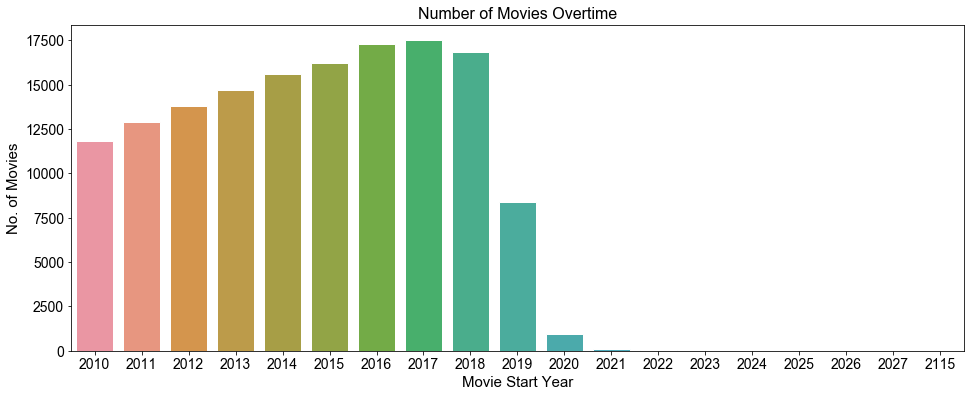

In [45]:
barplot_count(imdb_title_basics, 
              explode=False,
              x='start_year', 
              xlabel='Movie Start Year', 
              ylabel='No. of Movies', 
              title='Number of Movies Overtime')

## Answer:
> The supply of new movies is increasing over the years. So it's a growing market but with a lot of competition.

Also, because of the drop in 2018, it seems like the dataset was extracted in 18. It would be great to know that, however, this information is not available.

[Go Back to Table of Contents](#toc)
# Second Question: Which `genres` have the most movies? <a class="anchor" id="second-question"></a>
-------------------
With this question, we can understand a bit more about the demand. I'd believe that producers would not create movies of `genres` that are not popular. <br>Having this information would also help Microsoft to understand the market and start thinking about which strategy to apply (compete with the popular genres or focus on other/not so saturated genres).

### Distribution of No. of Movies by `genres` (All-Time)
I'm also separating genres from lists, meaning that I have one genre per row, so if one movie has two genres then we will see two records, one for each genre

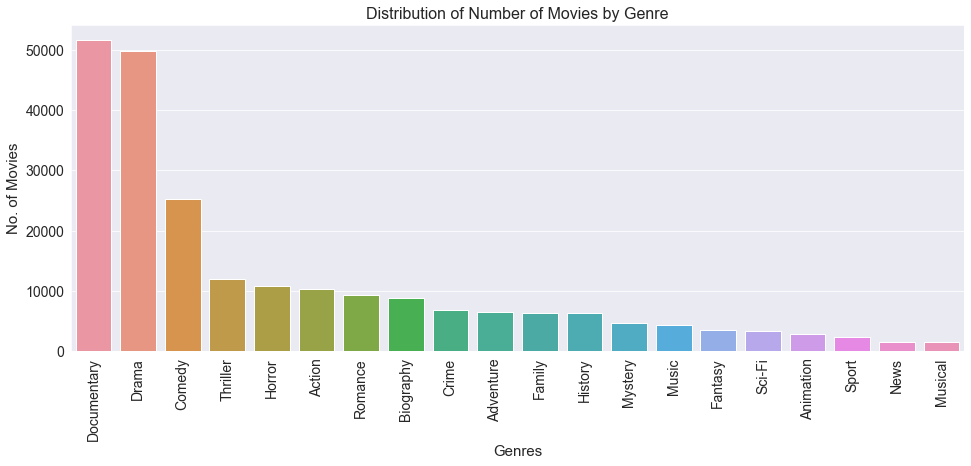

In [46]:
barplot_count(imdb_title_basics,
              explode=True,
              x='genres', 
              xlabel='Genres', 
              ylabel='No. of Movies', 
              title='Distribution of Number of Movies by Genre',
              xticks_rotation=True,
              sort_values=True)

Now I'm not separating them by row, so we will see the combinations of genres as well.

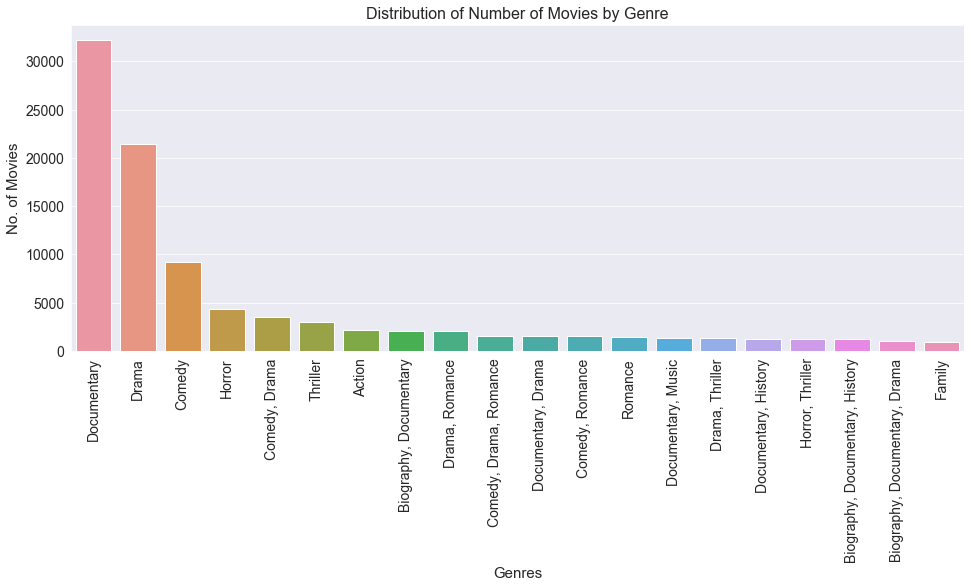

In [47]:
barplot_count(imdb_title_basics, 
              explode=False,
              x='genres', 
              xlabel='Genres', 
              ylabel='No. of Movies', 
              title='Distribution of Number of Movies by Genre',
              xticks_rotation=True,
              sort_values=True)

## Answer:
> It's interesting to see that most of the movies are Documentaries, Drama, or Comedy. So maybe if Microsoft's strategy is to enter a not so saturated `genre`, then avoiding Documentaries and Drama movies would be a good idea. On the other hand, I'm surprised to see `Documentary` as the one with most movies, but that might be the case because most of these are not created with a monetary goal, and I'd also think that probably Microsoft would not have as its first movie a Documentary. 

[Go Back to Table of Contents](#toc)
# Third Question: Which `genres` have consistently had the most No. of movies over time? <a class="anchor" id="third-question"></a>
-------------------
With this question, I can find trends of `genres` that are becoming more popular over time and maybe suggest Microsoft follow the same trends.

### Distribution of No. of Movies by `genres` over the years.

First, I need to see the total count of Movies by `start_year` and `genres`. Here, I'm also separating all genres in different rows. I noticed that some movies have multiple genres, but I'm trying to identify which one genre is more popular in this analysis.

In [48]:
# Group data by 'start_year' and 'genres', separate genres and let's see the Number of Movies by Year and Genre
year_genre = imdb_title_basics.explode('genres').groupby(['start_year', 'genres']).count()['tconst'].reset_index()
year_genre.columns = ['start_year', 'genres', 'count']
year_genre.head()

,start_year,genres,count
0,2010,Action,891
1,2010,Adventure,502
2,2010,Animation,198
3,2010,Biography,793
4,2010,Comedy,2179


Since the No. of Movies drastically goes down in 2020, I'm going to keep data only until 2020.

In [49]:
year_genre = year_genre[year_genre['start_year'] < 2020]

Next, instead of plotting on the total count of movies, I'm going to create a rank based on No. of movies, so we can easily visualize the `genres` is our chart and avoid having a few isolated at the top/bottom.

In [50]:
# Group by year and rank the 'count' column
year_genre['rank'] = year_genre.groupby(['start_year'])['count'].rank("dense", ascending=False)

# Keep only Top 5 genres by year
year_genre = year_genre[year_genre['rank'] < 6]
year_genre.head()

,start_year,genres,count,rank
0,2010,Action,891,4.0
4,2010,Comedy,2179,3.0
6,2010,Documentary,4393,1.0
7,2010,Drama,4297,2.0
17,2010,Romance,848,5.0


Finally, let's get ready to plot this. In order to achieve the chart I want, I'm going to pivot the data

In [51]:
to_plot = pd.pivot_table(year_genre, values='rank', index='start_year', columns=['genres'], aggfunc=np.sum)
to_plot

genres,Action,Biography,Comedy,Documentary,Drama,Horror,Romance,Thriller
start_year,,,,,,,,
2010,4.0,NaN,3.0,1.0,2.0,NaN,5.0,NaN
2011,4.0,NaN,3.0,1.0,2.0,NaN,NaN,5.0
2012,NaN,5.0,3.0,1.0,2.0,NaN,NaN,4.0
2013,NaN,4.0,3.0,1.0,2.0,NaN,NaN,5.0
2014,NaN,4.0,3.0,1.0,2.0,NaN,NaN,5.0
2015,NaN,NaN,3.0,1.0,2.0,5.0,NaN,4.0
2016,NaN,NaN,3.0,1.0,2.0,5.0,NaN,4.0
2017,NaN,NaN,3.0,1.0,2.0,5.0,NaN,4.0
2018,NaN,NaN,3.0,2.0,1.0,5.0,NaN,4.0


Now it's time to plot!

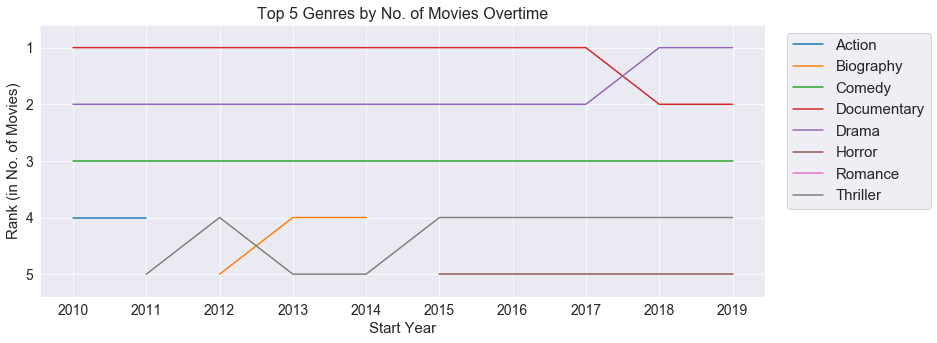

In [52]:
# Create list with y ticks (I don't need decimals on my chart)
yticks = list(range(6))
xticks = list(range(2010,2020,1))

# Create figure
to_plot.plot(figsize=(13,5))

# Invert y-axis so we have No. 1 on the top and 5 at the bottom
plt.gca().invert_yaxis()

# Set Axis Labels
plt.xlabel('Start Year', fontsize=15)
plt.ylabel('Rank (in No. of Movies)', fontsize=15)

# Set Ticks size
plt.xticks(xticks, fontsize=14)
plt.yticks(yticks, fontsize=14)

# Add margin so y doesn't start at 0
plt.margins(y=0.1)

# Add Title and legend outside the chart
plt.title('Top 5 Genres by No. of Movies Overtime', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=15)

plt.show();

# Answer 1:
> It seems like `Drama` has become more prevalent in 2018, and it's still sustaining the first position in 2019. Interestingly, `Thriller` and `Horror` have become consistent fourth/fifth places since 2015, and `Comedy` held the third position since the beginning of our dataset. This chart will clarify Microsoft's team on which `genres` are the most popular and might help them decide which genre they should choose. Also confirms the conclusion we had before that `Documentary`, `Drama` and `Comedy` are the most popular genres.

### Same analysis, but keeping list of `genres` intact.
In the previous analysis I'm separating genres in different rows, so we have only one genre per row. Next, I'm going to keep the combination of different `genres` intact.

In [53]:
# Let's create a copy of the DataFrame, I want to keep the original intact. Also, only records previous to 2020
genres_combination = imdb_title_basics[imdb_title_basics['start_year'] < 2020]

# Create a string column of 'genres' by concatenating them and remove movies with no genre
genres_combination['genres_combination'] = genres_combination['genres'].str.join(", ")
genres_combination = genres_combination[genres_combination['genres_combination'].isnull() == False]

# Create column with number of genres
genres_combination['no_of_genres'] = genres_combination['genres'].apply(lambda x: len(x))

In [54]:
# I'm going to count the number of movies by 'start_year', 'genres_combination' and 'no_of_genres'
combination_count = genres_combination.groupby(['start_year', 'genres_combination', 'no_of_genres']).size().reset_index()
combination_count.columns = ['start_year', 'genres_combination', 'no_of_genres', 'count']

# Let's create the ranking of those categories based on the total No. of Movies
combination_count['rank'] = combination_count.groupby(['start_year', 'no_of_genres'])['count'].rank("dense", ascending=False)

# Keep only top 5
combination_count = combination_count[combination_count['rank'] < 6]
combination_count.head()

,start_year,genres_combination,no_of_genres,count,rank
41,2010,"Action, Crime, Drama",3,68,4.0
217,2010,"Biography, Documentary",2,200,2.0
218,2010,"Biography, Documentary, Drama",3,127,2.0
221,2010,"Biography, Documentary, History",3,114,3.0
245,2010,Comedy,1,738,3.0


My idea for visualization is to plot the same chart we have above, since I'm going to do this multiple times, a function comes in handy.

In [55]:
def plot_top_5(df, no_of_genres):
    """Creates chart with Top 5 genres based on the number of elements/genres in list of genres.

    Args:
      df(pd.Dataframe): Pandas Dataframe with movie information
      no_of_genres(int): No. of genres a combination needs to have

    Returns:
      Plot
    """
    # Create Pivot table of dataframe and filter based on no_of_genres
    to_plot = pd.pivot_table(df[df['no_of_genres'] == no_of_genres], values='rank', index='start_year', columns=['genres_combination'], aggfunc=np.sum)
    
    # Create list with y ticks (I don't need decimals on my chart)
    yticks = list(range(6))
    xticks = list(range(2010,2020,1))

    # Create figure
    to_plot.plot(figsize=(11,5))

    # Invert y-axis so we have No. 1 on the top and 5 at the bottom
    plt.gca().invert_yaxis()

    # Set Axis Labels
    plt.xlabel('Start Year', fontsize=15)
    plt.ylabel('Rank (in No. of Movies)', fontsize=15)

    # Set Ticks size
    plt.xticks(xticks, fontsize=14)
    plt.yticks(yticks, fontsize=14)

    # Add margin so y doesn't start at 0
    plt.margins(y=0.1)

    # Add Title and legend outside the chart
    plt.title('Top 5 Genres by No. of Movies Overtime (Incl. Movies with ' + str(no_of_genres) + ' genres)', fontsize=16)
    plt.legend(bbox_to_anchor=(1.02, 1), fontsize=15)

    plt.show();

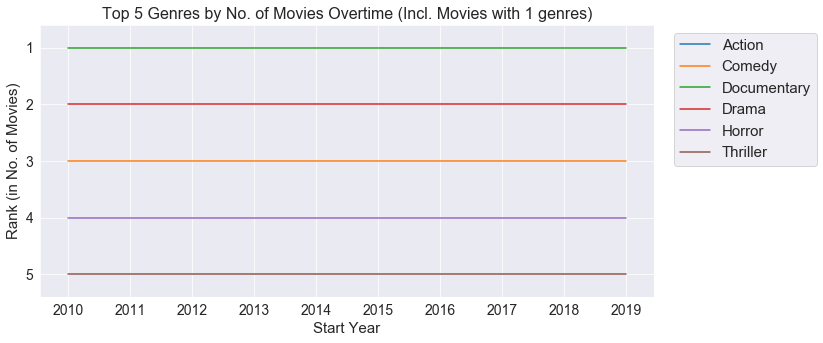

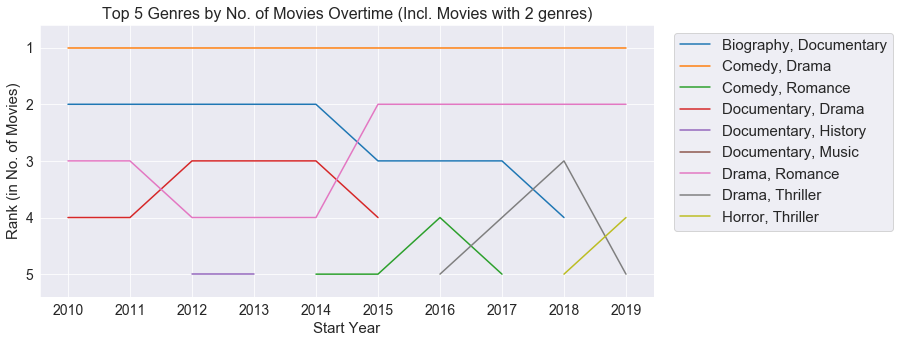

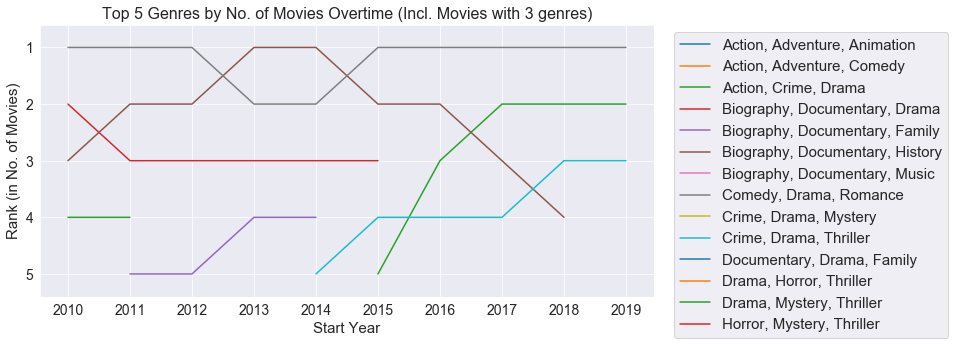

In [56]:
# Plot Top Genres with 1, 2 and 3 genres
for no_of_genres in [1,2,3]:
    plot_top_5(combination_count, no_of_genres)

# Answer 2:
> By looking at movies with only one genre, we get the same conclusions we had before. However, when looking at combinations of genres, we find many `Comedy + Drama` and `Comedy + Drama + Romance`. Also we see the rise of `Drama + Romance` and `Action + Crime + Drama`.

[Go Back to Table of Contents](#toc)
# Fourth Question: What are the best/most rated `genres`? <a class="anchor" id="fourth-question"></a>
-------------------
So far, I have done most of my analysis using No. of Movies. This time, I'm going to use No. of Votes. <br> I think that Ratings/Number of Votes can be more meaningful because **the act of voting requires someone to go to IMDB.com, search for the movie, and vote.** Therefore, I'd say that it gives us a **good understanding of the market from the consumers' standpoint**. Also, **if someone voted, it's because they watched the film, so the number carries more meaning.** <br>Therefore, by asking this question, we get a different perspective on `genres` and a **good idea of which one would have a higher chance of success.**

### Popularity by Ratings
So the next step is to look at the most popular (in No. of Votes and Rating) movies and see if we can find trends or patterns. First, I need to see the total count of Movies by `start_year` and `genres`. Here, I'm also separating all genres in different rows. I noticed that some movies have multiple genres, but I'm trying to identify which one genre is more prevalent in this analysis.

In [57]:
# Create new dataframe with title + ratings
genres_ratings = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst')

# I wonder how much of my dataset is left after joining ratings
print(len(genres_ratings) / len(imdb_title_basics))

0.5053645719290563


Wow, we have ratings only for 50% of the movies! That should be enough for us to come up with some insights, though.

Before we start, I'd like to look at the distribution of votes because it's unfair to compare a movie with ten votes against others with 100000 votes.

In [58]:
genres_ratings['numvotes'].describe().round()

count      73856.0
mean        3524.0
std        30294.0
min            5.0
25%           14.0
50%           49.0
75%          282.0
max      1841066.0
Name: numvotes, dtype: float64

Oh, it's all over the place. I'd think that Microsoft would be insterested on a movie with lots of reviews. Therefore, I'm going to focus on the top 1% of movies in terms of No. of Votes.

In [59]:
# First let's calculate the quantile
quantile_number = genres_ratings['numvotes'].quantile(0.99)
print(quantile_number)

83518.24999999993


In [60]:
# I'm going to keep only what's above or equal the quantile and concatenate the genres
top_quantile = genres_ratings[genres_ratings['numvotes'] >= quantile_number]
top_quantile['genres_combination'] = top_quantile['genres'].str.join(", ")

Next, I'm going to look at the genres trying to understand which ones are the most popular and have the highest ratings. To achieve that, I'm grouping the movies by `genres` picking the top 5 in terms of No. of Movies and taking some basic statistics on `averagerating`.

In [61]:
top_1_percent = top_quantile.groupby('genres_combination')['averagerating'].describe().reset_index()
top_1_percent = top_1_percent.sort_values('count', ascending=False).head(5)
top_1_percent

,genres_combination,count,mean,std,min,25%,50%,75%,max
10,"Action, Adventure, Sci-Fi",55.0,6.832727,0.899394,5.2,6.200,6.90,7.500,8.8
6,"Action, Adventure, Fantasy",32.0,6.409375,0.681251,5.2,5.950,6.50,6.900,8.0
48,"Adventure, Animation, Comedy",29.0,7.103448,0.679013,6.2,6.500,7.10,7.600,8.4
80,Comedy,20.0,6.120000,0.535675,4.3,5.975,6.25,6.425,6.7
27,"Action, Crime, Thriller",19.0,6.926316,0.485160,6.2,6.500,6.70,7.250,8.0


#### Conclusions
- `Action, Adventure, Sci-Fi`: Has the most Number of Movies. However, it has the highest a Standard Deviation, meaning that the ratings vary more relative to others.
- `Adventure, Animation, Comedy`: It has the highest mean and lower Standard Deviation relative to `Action, Adventures, Sci-Fi`. Also, has the highest min ratings.

Let's continue and see the distribution of `averagerating`.

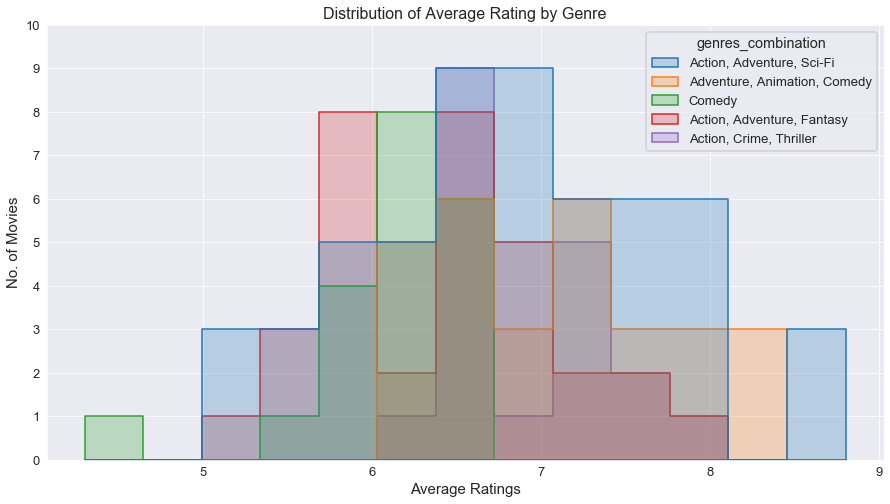

In [62]:
# Pull all movies that have one of those 5 categories.
top_quantile_genres = top_quantile[top_quantile['genres_combination'].isin(list(top_1_percent['genres_combination']))]

# Let's plot the distribution of 'average rating'
fig, ax = plt.subplots(figsize=(15,8))

# Set Context
sns.set_context("talk", font_scale=0.8)

# Create chart
s = sns.histplot(data=top_quantile_genres, x="averagerating", hue="genres_combination", ax=ax, element="step")

# Set Axis Labels
plt.xlabel('Average Ratings', fontsize=15)
plt.ylabel('No. of Movies', fontsize=15)

# Set Ticks size
plt.xticks(fontsize=13)
plt.yticks(list(range(0,11,1)), fontsize=13)

# Add Title and legend outside the chart
plt.title('Distribution of Average Rating by Genre', fontsize=16)
plt.show();

It seems like `Action, Adventure, Sci-Fi` has more records on high ratings and higher `mean` as we saw before.

Another good way to look at this is by stacking the columns.

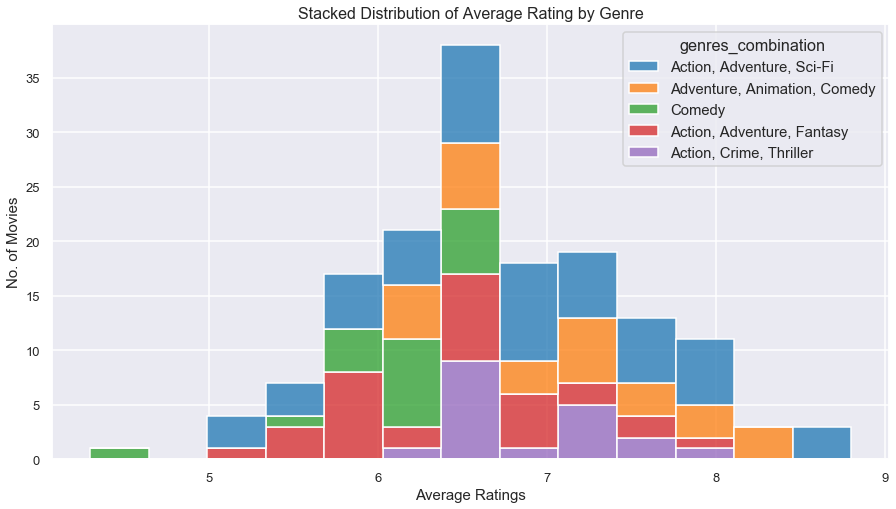

In [63]:
# Let's plot the distribution of 'average rating'
fig, ax = plt.subplots(figsize=(15,8))

# Set Context
sns.set_context("talk", font_scale=0.9)

# Create chart
sns.histplot(data=top_quantile_genres, x="averagerating", hue="genres_combination", multiple="stack", ax=ax)

# Set Axis Labels
plt.xlabel('Average Ratings', fontsize=15)
plt.ylabel('No. of Movies', fontsize=15)

# Set Ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add Title and legend outside the chart
plt.title('Stacked Distribution of Average Rating by Genre', fontsize=16)
plt.show();

Based on this chart, we can see two `genres` with more high rating movies: `Action, Adventure, Sci-Fi` and `Adventure, Animation, Comedy`.

### Popularity by Ratings over the years

I wonder if we can get to the same conclusions by looking at the same number over the years.

In [64]:
# First let me see if I have enough movies per year to analyze
genres_ratings.groupby('start_year').size()

start_year
2010    6792
2011    7389
2012    7680
2013    7990
2014    8371
2015    8494
2016    8721
2017    8713
2018    7526
2019    2180
dtype: int64

Hum. 2019 has way fewer movies than the rest (as previously noted). However, 2019 represents the most recent year in our dataset. So I'm going to keep it, but it's good to not forget that while I'm analyzing 2019.

To look at the most popular movies over time, let's to the following:
- Loop through the years
- Keep only the top 1% of movies in terms of No. of Votes
- Count the No. of Movies per Genre
- Select the Top 5 in No. of Movies

In [65]:
def analyze_genres(df, genres_field, comparison_metric, quantile_perc=0.99):
    """Creates report with top genres based on metric selected, quantile number and genre field.

    Args:
      df(pd.DataFrame): DataFrame with Genres/Ratings information.
      genres_field(str): Choose genre to be analyzed: 'genres' or 'genres_combination'. 'genres' will
                         separate each genre into different rows, while 'genres_combination' will keep
                         all different combinations.
      comparison_metric(str): Choose which metric to select the top genres: 'count' or 'mean'. 
      quantile_perc(float): Quantile Percentage for top movies (Default value is 99%)

    Returns:
      A DataFrame with results.
    """
    
    # Create a list of years and sort it
    years_sorted = sorted(list(df['start_year'].unique()))

    # Go through every year
    for idx, year in enumerate(years_sorted):

        # Filter genre/ratings dataframe based on year
        ratings_by_year = df[df['start_year'] == year]

        # Get the top X% by number of votes
        top_quantile_number = ratings_by_year['numvotes'].quantile(quantile_perc)

        # I'm going to keep only what's above or equal the quantile
        top_quantile = ratings_by_year[ratings_by_year['numvotes'] >= top_quantile_number]
        
        # If 'genres_combination' then we need to combine the genres and create a string
        if genres_field == 'genres_combination':
            top_quantile[genres_field] = top_quantile['genres'].str.join(", ")
            
        # If 'genres' then each genre will be analyzed seperately, not the combination.
        elif genres_field == 'genres':
            top_quantile = top_quantile.explode(genres_field)
        
        else:
            print('Invalid genres_field')
            break

        # Compare genres based on total no. of movies in top X% number of votes.
        if comparison_metric == 'count':

            # Group by Genres and count number of records/movies
            top_percent = top_quantile.groupby(genres_field).count()['averagerating'].reset_index()
            top_percent.columns = [genres_field, 'count']
            
            # Sort by count and select top 5 based on highest count
            top_percent = top_percent.sort_values('count', ascending=False).reset_index(drop=True).head(5)
        
        # Compare genres based on ratings mean, we will select the movies with highest average rating
        elif comparison_metric == 'mean':
            
            # Group by Genres and calculate basic statistics on Average Rating
            top_percent = top_quantile.groupby(genres_field).describe()['averagerating'].reset_index()
            
            # Select top 5 in count so we keep only relevant genres, then sort records by mean
            top_percent = top_percent.sort_values('count', ascending=False).reset_index(drop=True).head(5)
            top_percent = top_percent.sort_values('mean', ascending=False).reset_index(drop=True)
            
        else:
            print('Invalid metric')
            break
    
        # Create ranking and year column
        top_percent['rank'] = top_percent.index + 1
        top_percent['start_year'] = year

        # Create master dataframe where we will store each dataframe for each year
        if idx == 0:
            master_df = top_percent.copy()
        else:
            master_df = pd.concat([master_df, top_percent])

    # Create Pivot Table of master and transpose the dataframe
    to_plot = pd.pivot_table(master_df, values='rank', index='start_year', columns=[genres_field], aggfunc=np.sum)
    to_plot = to_plot.transpose().reset_index()

    # Count the number of times the genre was in the top 5 over the last 10 years
    to_plot['no_of_times'] = to_plot.apply(lambda x: x.notnull().sum(), axis='columns') - 1
    
    # Return result
    return to_plot.fillna('').sort_values('no_of_times', ascending=False)

### Rank of  `genres_combination` over time by No. of Movies with the most votes
Generate report looking at `genres_combination` and choosing the top movies based on count.

In [66]:
analyze_genres(genres_ratings, genres_field='genres_combination', comparison_metric='count')

start_year,genres_combination,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,no_of_times
5,"Action, Adventure, Sci-Fi",4,2,1,1,1,1,2,,1,1,9
12,"Adventure, Animation, Comedy",2,5,4,,,2,3,5,,,6
4,"Action, Adventure, Fantasy",3,,,,,,1,1,2,,4
0,"Action, Adventure, Animation",,3,,,5,,,,,3,3
2,"Action, Adventure, Comedy",,,,,,,,2,3,4,3
14,Comedy,,,3,5,,,4,,,,3
11,"Action, Thriller",,,,3,,,5,,,,2
18,"Drama, Romance",,,,4,,4,,,,,2
16,"Comedy, Romance",,1,,,2,,,,,,2
15,"Comedy, Drama, Romance",1,,,,,5,,,,,2


#### Conclusions:
- `Action, Adventures, Sci-Fi`: Definitely the most popular genre over the years in terms of No. of Movies (first place several times). It seems to be a `genre` that's popular amongst it's fans since they vote for these movies more than others.
- `Action, Adventure, Fantasy`: Also another `genre` that has been popular over the last years, there's still no movies in 2019 though, it might be a good opportunity.

### Rank of  `genres_combination` over time by Highest Average Rating
Another way of looking at this, is to understand which `genres` have the best ratings. We can do that by looking at the mean of `averagerating` among the movies in a given `genre` and that's what I'm going to do next.

In [67]:
analyze_genres(genres_ratings, genres_field='genres_combination', comparison_metric='mean')

start_year,genres_combination,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,no_of_times
5,"Action, Adventure, Sci-Fi",2,4,4,2,3,5,2,,3,1,9
12,"Adventure, Animation, Comedy",1,3,3,,,4,1,3,,,6
4,"Action, Adventure, Fantasy",5,,,,,,3,5,4,,4
0,"Action, Adventure, Animation",,1,,,1,,,,,2,3
2,"Action, Adventure, Comedy",,,,,,,,1,2,3,3
14,Comedy,,,5,5,,,5,,,,3
11,"Action, Thriller",,,,4,,,4,,,,2
18,"Drama, Romance",,,,1,,2,,,,,2
16,"Comedy, Romance",,5,,,5,,,,,,2
15,"Comedy, Drama, Romance",3,,,,,3,,,,,2


#### Conclusions:
- `Action, Adventure, Sci-Fi` and `Action, Adventure, Fantasy` have a lot of movies, however, not all of them have the best ratings. `Adventure, Animation, Comedy` has better positions, so it might be a genre that's easier to succeed in terms of ratings.

### Rank of unique  `genres` over time by No. of Movies with the most votes
What if instead of looking at `genres_combination` we look at individual genres? 

In [68]:
analyze_genres(genres_ratings, genres_field='genres', comparison_metric='count')

start_year,genres,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,no_of_times
0,Action,1,2,2,1,1,2,2,2,1,1,10
1,Adventure,2,3,4,4,3,3,3,3,3,2,10
4,Drama,3,1,1,2,2,1,1,1,2,3,10
2,Comedy,4,4,3,3,4,4,4,4,4,,9
6,Thriller,5,5,5,,,,5,5,,4,6
5,Sci-Fi,,,,,5,5,,,5,,3
3,Crime,,,,5,,,,,,5,2


#### Conclusions
- `Action`, `Adventure`, `Drama` and `Comedy` are consistenly on the top in number of movies with highest number of votes. These individual genres could be good opportunities.

### Rank of unique  `genres` over time by Highest Average Rating

In [69]:
analyze_genres(genres_ratings, genres_field='genres', comparison_metric='mean')

start_year,genres,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,no_of_times
0,Action,4,5,4,5,4,4,5,3,5,2,10
1,Adventure,5,4,3,4,3,2,4,4,3,1,10
4,Drama,1,1,1,1,1,1,1,2,1,4,10
2,Comedy,3,3,5,3,5,3,3,1,2,,9
6,Thriller,2,2,2,,,,2,5,,5,6
5,Sci-Fi,,,,,2,5,,,4,,3
3,Crime,,,,2,,,,,,3,2


#### Conlusions
- `Drama` over the last 10 years ended in first place in ratings 8 times! It could be a good genre if we are looking for high ratings.
- Second place is all over the place, with `Thriller` having some consistency initially.

### Understand `Action, Adventure, Sci-Fi` , `Action, Adventure, Fantasy` and `Adventure, Animation, Comedy`
These are extremely popular `genres` I want to take a look at the movies and try to understand why they're so popular.

`Action, Adventure, Sci-Fi`

In [70]:
understand_genres = genres_ratings.copy()
understand_genres['genres_combination'] = understand_genres['genres'].str.join(", ")
action_1 = understand_genres[understand_genres['genres_combination'] == 'Action, Adventure, Sci-Fi']
action_1.sort_values('numvotes', ascending=False).head(10)[['original_title']]

,original_title
2387,Inception
325,The Avengers
2523,The Hunger Games
2524,Mad Max: Fury Road
1851,Iron Man Three
43419,Avengers: Infinity War
124,Captain America: The First Avenger
11797,Captain America: The Winter Soldier
24058,Avengers: Age of Ultron
1423,Iron Man 2


`Action, Adventure, Fantasy`

In [71]:
action_2 = understand_genres[understand_genres['genres_combination'] == 'Action, Adventure, Fantasy']
action_2.sort_values('numvotes', ascending=False).head(10)[['original_title']]

,original_title
25595,Star Wars: Episode VII - The Force Awakens
251,Thor
30730,Batman v Superman: Dawn of Justice
14651,Thor: The Dark World
2476,Suicide Squad
1328,Doctor Strange
114,Wonder Woman
26070,Star Wars: Episode VIII - The Last Jedi
1847,Pirates of the Caribbean: On Stranger Tides
478,Justice League


`Adventure, Animation, Comedy`

In [72]:
action_3 = understand_genres[understand_genres['genres_combination'] == 'Adventure, Animation, Comedy']
action_3.sort_values('numvotes', ascending=False).head(10)[['original_title']]

,original_title
91,Toy Story 3
17199,Inside Out
21563,Frozen
30402,Zootopia
61,Tangled
9775,Wreck-It Ralph
7474,Despicable Me 2
1361,Brave
3047,Monsters University
23663,Coco


# Answer:

**The Fanbase factor:**
> `Action, Adventure, Sci-Fi`, `Adventure, Animation, Comedy` and `Action, Adventure, Fantasy` have been very popular over the last ten years. They are competitive `genres` with the most No. of Movies in the Top 1% of movies in terms of number of votes. <br><br>I think the reason is that most of these movies are **superhero movies (Captain America, Iron Man 2, Thor, and Wonder Woman)**. Or part of a **movie series (Avengers, Star Wars, Pirates of the Caribbean, Toy Story, Despicable Me)** or **Pixar Movies**. <br><br>
**They attract a lot of fans over time. So once you have that fanbase, it becomes easier to create movies with a lot of views and become popular.** <br><br>
A good strategy for Microsoft might be to enter this world and try to **partner with another company** like DC/Marvel and create an exclusive superhero series. The good thing about a partnership is that they wouldn't have to develop a new story since they would use an existing character. <br><br>
Also, another option would be to develop a new `Adventure, Animation, Comedy` story with **unique characters like Minions on Despicable Me.** This one is a bit harder to execute, though.

[Go Back to Table of Contents](#toc)
# Fifth Question: Which roles are the most important in a movie? <a class="anchor" id="fifth-question"></a>
-------------------
The idea of this question is to **understand which roles require more attention** or are more likely to **bring more views/votes to movies**. Maybe there are some similarities among successful films. <br> By knowing which roles bring more votes, Microsoft can plan their budget accordingly or dedicate more time to find the best on important roles.

## Let's build our team!

Next, I will look at the people working on these movies to see if we can build a reliable team that will most likely guarantee success. I hypothesize that in movies, the actor/actress/director/etc. matter a lot and will attract more viewers' attention.

The first step is to bring all that information together, so I'm going to take the principal members, bring their names, and then merge that with the previous dataframe we built where we have genre, ratings, and number of votes.

In [73]:
# First step is to bring all that information together
crew_names = pd.merge(imdb_title_principals, imdb_name, on='nconst')
crew_names_genres_ratings = pd.merge(crew_names, genres_ratings, on='tconst')
crew_names_genres_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"[actor, writer, producer]","[tt0104271, tt0094789, tt0102076, tt0111414]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"[actress, producer, miscellaneous]","[tt0315327, tt0092569, tt3216866, tt0102138]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,1928.0,2017.0,"[actor, producer, miscellaneous]","[tt0096316, tt0097123, tt0109707, tt0053125]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,1937.0,NaN,"[actor, writer, director]","[tt0086034, tt0086960, tt1243957, tt0066921]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"[soundtrack, actor, composer]","[tt1478964, tt0443706, tt0118749, tt1408253]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6


We have one row for each 'principal' person who was part of the movies.

#### Most Votes by Person/Role

The first noticeable thing to do is look at the number of votes by person and come up with a list of people who bring more votes.

In [74]:
total_num_votes = crew_names_genres_ratings.groupby(['nconst', 'primary_name']).sum()['numvotes']
total_num_votes.sort_values(ascending=False).head(10)

nconst     primary_name     
nm0498278  Stan Lee             7445176
nm0456158  Jack Kirby           6703417
nm0000138  Leonardo DiCaprio    6652084
nm0000375  Robert Downey Jr.    6356111
nm0634240  Christopher Nolan    5642382
nm0262635  Chris Evans          5508214
nm2225369  Jennifer Lawrence    5029124
nm0858799  Emma Thomas          4995094
nm0362766  Tom Hardy            4943410
nm1165110  Chris Hemsworth      4848892
Name: numvotes, dtype: int64

I'm not surprised to see all these famous names above. However, it might be a better idea to look at them based on their role.

### How to appropriately count votes?
The only problem of looking at their roles is that sometimes a movie has ten actors, which means that the `No of Votes` will be multiplied by 10x if I assign the same number to all principal members. It's also expected that a movie with several starts will have more votes, so it's fair to distribute the votes evenly. This approach will favor higher ratios of vote per person.

To do that, I'm going to 'distribute' these votes by taking the `No of Votes` and dividing it evenly among the principal members.

For example, if a movie has the following:
- 9 Principal Members (4 Actors, 4 Actresses, 1 Director)
- `No of votes` = 900,000

Each principal member will be attributed with:
- Weighted Number of Votes = 900,000 / 9 = 100,000 votes

The idea is to distribute the importance of each member evenly and not favoring anybody. On the other hand, if a movie has two members and the same 900,000 votes, these two persons have a lot of importance since they brought more votes.

In [75]:
# We need to adjust our dataframe to include a column with total number of members by movie
# First I'm calculating the total number of members by title
no_of_members_by_movie = crew_names_genres_ratings.groupby('tconst').count()['ordering'].reset_index()
no_of_members_by_movie.columns = ['tconst', 'no_of_members']

# Now, I'm merging the total number with 'crew_names_genres_ratings' and then I can calculate the 'weighted_votes'
# by dividing the total 'numvotes' by 'no_of_members'
crew_names_genres_ratings = pd.merge(crew_names_genres_ratings, no_of_members_by_movie, on='tconst')
crew_names_genres_ratings['weighted_votes'] = crew_names_genres_ratings['numvotes'] / crew_names_genres_ratings['no_of_members']
crew_names_genres_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,no_of_members,weighted_votes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"[actor, writer, producer]","[tt0104271, tt0094789, tt0102076, tt0111414]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6,7,0.857143
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"[actress, producer, miscellaneous]","[tt0315327, tt0092569, tt3216866, tt0102138]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6,7,0.857143
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,1928.0,2017.0,"[actor, producer, miscellaneous]","[tt0096316, tt0097123, tt0109707, tt0053125]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6,7,0.857143
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,1937.0,NaN,"[actor, writer, director]","[tt0086034, tt0086960, tt1243957, tt0066921]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6,7,0.857143
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"[soundtrack, actor, composer]","[tt1478964, tt0443706, tt0118749, tt1408253]",Remembering Nigel,Remembering Nigel,2015,NaN,[Comedy],7.8,6,7,0.857143


In [76]:
# Now, I'm going to sum the 'weighted_votes' by person and category
total_num_votes_role = crew_names_genres_ratings.groupby(['nconst', 'primary_name', 'category']).sum()['weighted_votes']
total_num_votes_role = total_num_votes_role.reset_index()
total_num_votes_role.columns = ['nconst', 'primary_name', 'category', 'total_weighted_votes']
total_num_votes_role.head()

,nconst,primary_name,category,total_weighted_votes
0,nm0000002,Lauren Bacall,actress,437.100000
1,nm0000002,Lauren Bacall,archive_footage,129.900000
2,nm0000002,Lauren Bacall,self,106.000000
3,nm0000003,Brigitte Bardot,archive_footage,142.611111
4,nm0000005,Ingmar Bergman,archive_footage,187.834921


Let's see the distribution in No. of Votes by `category`. <br> But instead of showing totals, I'm going to calculate the % of each role from the total sum of votes.

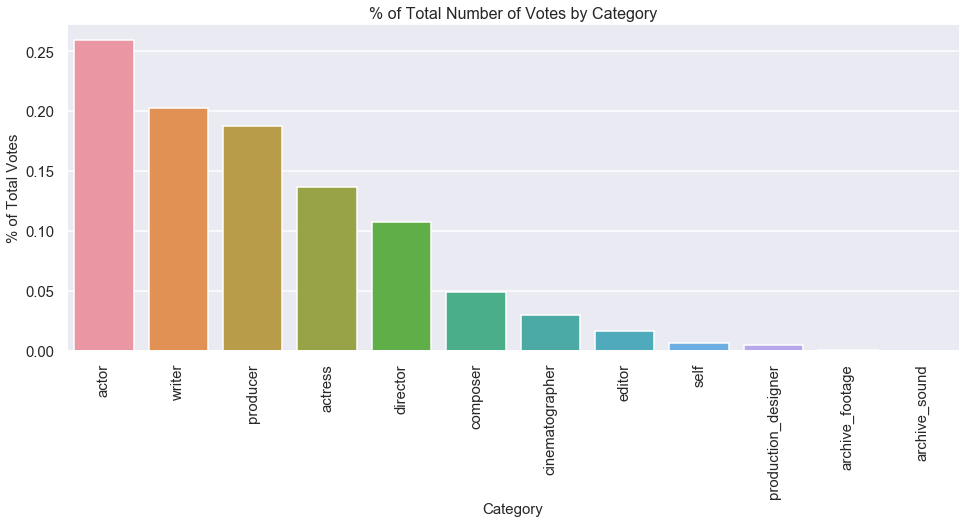

In [77]:
# Calculate total weightes number of votes by role
to_plot = total_num_votes_role.groupby('category').sum()['total_weighted_votes'].reset_index()
to_plot.columns = ['category', 'num_of_votes']

# Divide that by total number of votes
to_plot['votes_perc'] = to_plot['num_of_votes'] / to_plot['num_of_votes'].sum()
to_plot = to_plot.sort_values('votes_perc', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(16,6))

sns.barplot(x='category', y="votes_perc", data=to_plot, ax=ax)
plt.title('% of Total Number of Votes by Category', size=16)
plt.ylabel('% of Total Votes', fontsize=15)
plt.xlabel('Category', fontsize=15)
plt.xticks(rotation=90)

plt.show();

change approach, divide by total number of roles, then within the roles divide again.

# Answer:
> The chart above shows **which roles were the most frequent in high voted movies**. Therefore, we could say that it reports the **level of importance of each role**. We can say that Microsoft should first **focus on getting the best actors, then writers, producers, actresses, and directors**. <br><br>Unfortunately, this analysis is biased towards men, as we can see that actors have a higher percentage relative to actresses. And the reason is that there are more actors in high voted movies. I'd probably group both as the same to avoid adding this type of bias.

[Go Back to Table of Contents](#toc)
# Sixth Question: What's the impact in terms of the popularity of having a movie playing internationally? <a class="anchor" id="sixth-question"></a>
-------------------
This question aims to understand whether Microsoft should also focus on making the movie **famous internationally** or if most of the popular films didn't necessarily were played in different countries. <br>By launching a film in different countries, there's much preparation and other things to consider (Marketing Material, Subtitles, Local Titles, etc.). So knowing this ahead of time is helpful.

To answer the question, I'm going to again rely on the No. of Votes per movie and use the different titles in different regions to estimate how many places/countries/regions the film was played.

In [78]:
region_votes = pd.merge(imdb_title_ratings, imdb_title_akas, right_on='title_id', left_on='tconst')
region_votes.head()

,tconst,averagerating,numvotes,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,tt1042974,1,Just Inès,NaN,NaN,original,NaN,True
1,tt1042974,6.4,20,tt1042974,2,Samo Ines,RS,NaN,imdbDisplay,NaN,False
2,tt1042974,6.4,20,tt1042974,3,Just Inès,GB,NaN,NaN,NaN,False
3,tt1043726,4.2,50352,tt1043726,10,The Legend of Hercules,NaN,NaN,original,NaN,True
4,tt1043726,4.2,50352,tt1043726,11,Hércules - A Lenda Começa,PT,NaN,imdbDisplay,NaN,False


In [79]:
# Show unique regions
region_votes['region'].unique()

array([nan, 'RS', 'GB', 'PT', 'JP', 'AL', 'HR', 'VN', 'IT', 'GR', 'UA',
       'RO', 'US', 'CA', 'CL', 'MX', 'RU', 'TR', 'IL', 'AR', 'PE', 'FR',
       'ES', 'BR', 'PL', 'BG', 'HU', 'VE', 'SE', 'XWW', 'XEU', 'SI', 'UY',
       'FI', 'DE', 'PH', 'NO', 'DK', 'EE', 'BE', 'LT', 'CO', 'CZ', 'AT',
       'GE', 'IE', 'ZA', 'BA', 'LV', 'AU', 'LU', 'IN', 'KR', 'IR', 'NL',
       'DZ', 'CN', 'NZ', 'ID', 'MY', 'JO', 'RW', 'EG', 'CH', 'LI', 'TH',
       'BF', 'CSXX', 'SG', 'NP', 'SK', 'BD', 'PA', 'KE', 'PK', 'PS', 'HK',
       'MK', 'KZ', 'TW', 'LK', 'IS', 'MW', 'DO', 'BO', 'PY', 'SL', 'AZ',
       'AF', 'AE', 'PR', 'CU', 'NG', 'IQ', 'AM', 'CY', 'GU', 'HN', 'XAS',
       'TN', 'BY', 'SA', 'HT', 'MT', 'BH', 'KH', 'KG', 'FO', 'SV', 'XSA',
       'GT', 'LB', 'BT', 'CR', 'XKV', 'UZ', 'MA', 'ME', 'LA', 'SB', 'XKO',
       'SY', 'TZ', 'QA', 'MN', 'EC', 'JM', 'NE', 'AN', 'MV', 'TT', 'ET',
       'CF', 'CM', 'MM', 'TJ', 'SM', 'MD', 'GW', 'KW', 'AD', 'BB', 'MZ',
       'BS', 'SO', 'BZ', 'IM', 'MC', 'AW', '

In [80]:
# Let's see how many of the records are nulls
print(len(region_votes[region_votes['region'].isnull()]) / len(region_votes))
print(len(region_votes[region_votes['region'].isnull()]['tconst'].unique()) / len(region_votes['tconst'].unique()))

0.16601987731373613
0.5300602210500597


16% of the dataframe is null and 53% of the titles have at least one missing `region`. <br>Let's investigate a bit further to see if there's anything we can do about it.

In [81]:
region_votes[region_votes['region'].isnull()].sort_values('title')

,tconst,averagerating,numvotes,title_id,ordering,title,region,language,types,attributes,is_original_title
250195,tt2346170,5.6,40,tt2346170,2,#1 Serial Killer,NaN,NaN,original,NaN,True
166270,tt4837062,7.3,692,tt4837062,2,#5,NaN,NaN,alternative,NaN,False
221413,tt1817730,4.3,82,tt1817730,1,#ActorsWanted,NaN,NaN,NaN,new title,False
43607,tt3914120,7.8,17,tt3914120,1,#Afskåret,NaN,NaN,working,NaN,False
222583,tt2323912,7.5,25,tt2323912,2,#BeastMode,NaN,NaN,working,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
136959,tt1754953,4.1,27,tt1754953,1,Þetta Reddast,NaN,NaN,original,NaN,True
81758,tt3823018,6.9,1316,tt3823018,9,Þrestir,NaN,NaN,original,NaN,True
260640,tt3509772,6.6,101,tt3509772,1,ärtico,NaN,NaN,original,NaN,True
2203,tt7436642,7.7,1842,tt7436642,2,Το Τελευταίο Σημείωμα,NaN,NaN,NaN,NaN,False


The data is not consistent and since it represents 53% of all titles I'm not going to remove it. However, to keep my calculations simple, I'm going to replace `null` with a placeholder `blank`.

In [82]:
region_votes.loc[region_votes['region'].isnull(), 'region'] = 'blank'

#### Calculate Average No. of Votes by No. of Regions

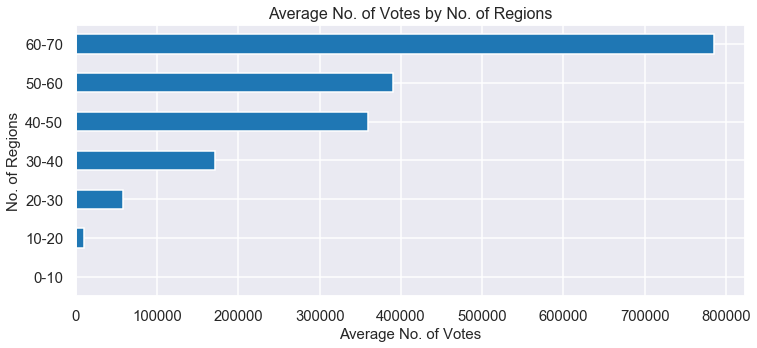

In [83]:
# Calculate No. of Regions by Title
movie_region_count = region_votes.groupby(['tconst', 'numvotes']).count()['region']
movie_region_count = movie_region_count.reset_index()
movie_region_count.columns = ['tconst', 'numvotes', 'num_of_regions']

# Create bins of No. of Regions
bins = list(range(0,80,10))
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
movie_region_count['binned'] = pd.cut(movie_region_count['num_of_regions'], bins=bins, labels=labels)

# Create DataFrame to plot
to_plot = movie_region_count.groupby('binned').mean()['numvotes'].reset_index()
to_plot.columns = ['num_of_regions', 'avg_num_of_votes']

# Create chart
to_plot.plot.barh(x='num_of_regions', y='avg_num_of_votes', figsize=(12,5), legend=False)

# Set title, labels and ticks size
plt.title('Average No. of Votes by No. of Regions', size=16)
plt.ylabel('No. of Regions', fontsize=15)
plt.xlabel('Average No. of Votes', fontsize=15)
plt.show();

# Answer:
> Based on the chart above, we can see that the **Average No. of Votes increases as the No. of Regions in which the movie is played increases**. Therefore, my recommendation for Microsoft would be to prepare to **launch the film internationally**.

[Go Back to Table of Contents](#toc)
# Conclusions <a class="anchor" id="conclusions"></a>

-------------------
**1. The Film Industry is a competitive and growing market:** The supply of new movies is increasing over the years. The reason for that can be the following:

- Movies have become cheaper to make over time.
- The market and customer base grew. So the demand for more content is growing.
- People have access to the internet + Consumers are moving from Cable TV to On-Demand subscriptions.

Those are all positive reasons for Microsoft to enter the Film Industry. The only problem is that competition has grown a lot, and Microsoft will compete with Apple, Netflix, Disney, and YouTube. Moreover, there's a lot of discussions on the subscription market's saturation, so their pricing will have to be competitive.

**2. Documentary, Drama, and Comedy are the most popular genres in No. of Movies:** After analyzing movies in IMDb's database, it's possible to see significant numbers of `Documentaries`, `Drama` and `Comedy` movies. When looking at different combinations of genres, `Comedy + Drama` and `Comedy + Drama + Romance` have had the most No. of Movies over the last ten years. For Microsoft, these might be too saturated genres to enter but show a picture of the industry.

**3. Building a Fanbase:** During the analysis of the Most Voted/Best Rated movies, `Action, Adventure, Sci-Fi`, `Adventure, Animation, Comedy` and `Action, Adventure, Fantasy` showed up a lot over the last ten years. Those were the `genres` with the most No. of Movies in the Top 1% of movies in terms of number of votes. <br>I think the reason is that most of these movies are **superhero movies (Captain America, Iron Man 2, Thor, and Wonder Woman)**, part of a **movie series (Avengers, Star Wars, Pirates of the Caribbean, Toy Story, Despicable Me)** or **Pixar Movies**. <br> **They attract a lot of fans over time. So once you have that fanbase, it becomes easier to create movies with a lot of views, votes and become popular.** <br>
Therefore, a good strategy for Microsoft might be to enter this world and try to **partner with another company** like DC/Marvel and create an exclusive superhero series. The good thing about a partnership is that they wouldn't have to develop a new story since they would use an existing character. <br>Also, another option would be to develop a new `Adventure, Animation, Comedy` story with **unique characters like Minions on Despicable Me.** This one is a bit harder to execute, though.

**4. Hire the best on roles that matter the most:** After analyzing **which roles were the most frequent in high voted movies**. The recommendation is to **focus on getting the best actors, then writers, producers, actresses, and directors**. _Note: Unfortunately, this analysis is biased towards men since actors have higher importance relative to actresses. And the reason is that there are more actors in high voted movies. I'd probably group both as the same to avoid adding this type of bias._

**5. Have an international footprint:** The **Average No. of Votes increases as the No. of Regions in which the movie is played increases**. Therefore, my recommendation for Microsoft would be to prepare to **launch the film internationally**.

[Go Back to Table of Contents](#toc)
# Final Thoughts <a class="anchor" id="final-thoughts"></a>

-------------------
More could be done to gather more insights. For example, I'd like to see the number of Tickets Sold, viewers + demographics, and more information on which Platform/Studio created the movie. Moreover, understanding Microsoft's goals would also guide my analysis to relevant conclusions for them. For example, I don't know if they're trying to be profitable in this endeavor or if the goal is to enter this industry and then worry about profitability. 